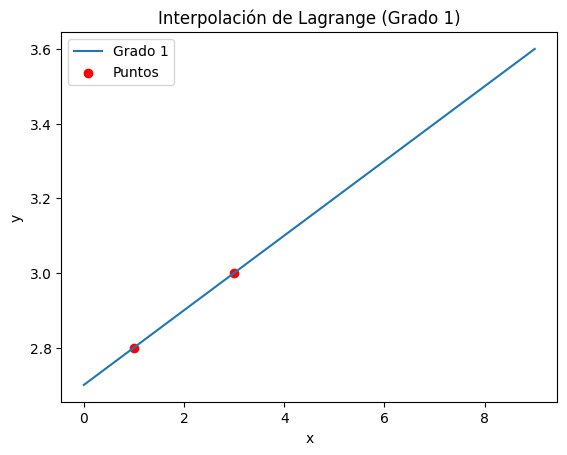

Ecuación de interpolación de Lagrange (Grado 1):
0.1*x + 2.7



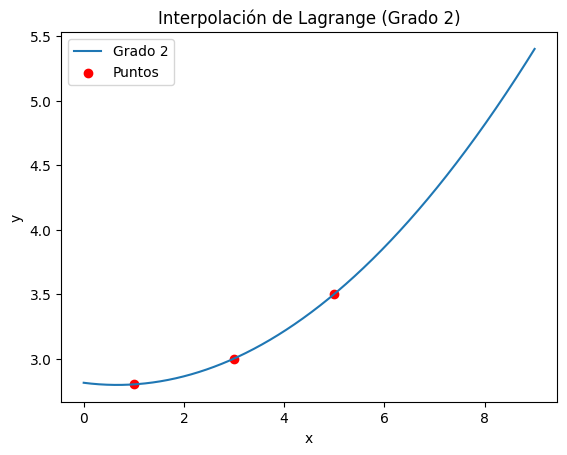

Ecuación de interpolación de Lagrange (Grado 2):
0.0375*x**2 - 0.0499999999999998*x + 2.8125



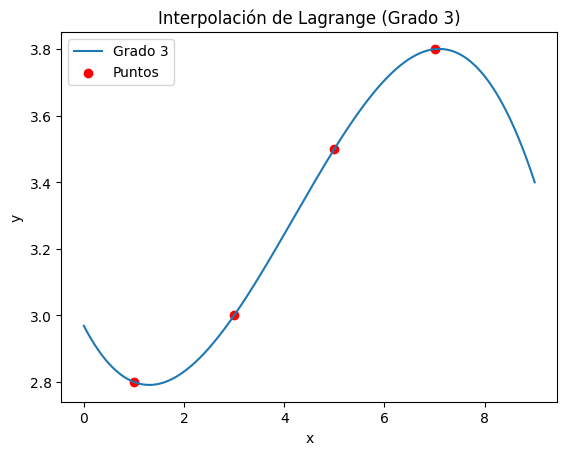

Ecuación de interpolación de Lagrange (Grado 3):
-0.0104166666666667*x**3 + 0.13125*x**2 - 0.289583333333333*x + 2.96875



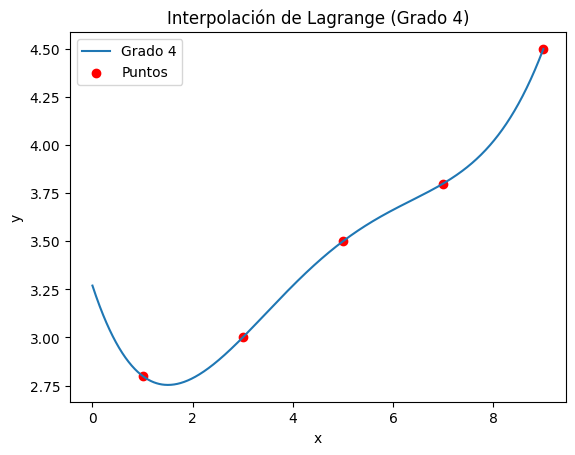

Ecuación de interpolación de Lagrange (Grado 4):
0.00286458333333334*x**4 - 0.0562500000000001*x**3 + 0.377604166666667*x**2 - 0.79375*x + 3.26953125



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, simplify

def lagrange_interpolation(points, degree):
    n = degree + 1
    
    lagrange_polynomials = []
    for i in range(n):
        lagrange_poly = []
        for j in range(n):
            if i == j:
                continue
            x_i, y_i = points[i]
            x_j, y_j = points[j]
            lagrange_poly.append((symbols('x')-x_j)/(x_i-x_j))
        lagrange_polynomials.append(lagrange_poly)
  
    interpolation_poly = 0
    for i in range(n):
        coeff = points[i][1]
        for j in range(n):
            if i == j:
                continue
            x_j, y_j = points[j]
            coeff *= (symbols('x')-x_j)/(points[i][0]-x_j)
        interpolation_poly += coeff
  
    interpolation_poly = simplify(interpolation_poly)
  
    return interpolation_poly

points = [(1, 2.8), (3, 3), (5, 3.5), (7, 3.8), (9, 4.5)]

x_values = np.linspace(0, 9, 1000)

for degree in range(1, 5):
    interpolation_poly = lagrange_interpolation(points[:degree+1], degree)
    interpolation_function = eval(f"lambda x: {interpolation_poly}")
    y_values = interpolation_function(x_values)
    
    plt.figure()
    plt.plot(x_values, y_values, label=f"Grado {degree}")
    plt.scatter([x[0] for x in points[:degree+1]], [x[1] for x in points[:degree+1]], color="red", label="Puntos")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Interpolación de Lagrange (Grado {degree})")
    plt.show()

    print(f"Ecuación de interpolación de Lagrange (Grado {degree}):")
    print(interpolation_poly)
    print()



1.   Para grado 1 el valor en (4.75) es = 3.175
2.   Para grado 2 el valor en (4.75) es = 3.421
3.   Para grado 3 el valor en (4.75) es = 0.777
4.   Para grado 4 el valor en (4.75) es = 3.021



